# OLA2
## Introduction / Problem Statement
Lifestyle-related diseases such as diabetes are among the leading causes of death and long-term health complications globally. The goal of this project is to explore different supervised machine learning models to predict whether an individual has diabetes based on health-related indicators. 


### Dataset Description
I am using subset of the CDC’s BRFSS 2015 dataset: **`diabetes_binary_5050split_health_indicators_BRFSS2015.csv`** 
- [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv)

It contains:
- **70,692 survey responses** collected by the CDC through the BRFSS 2015 survey
- **21 health-related features** per individual
- **Balanced data:** Equal amount of postive and negative cases.

#### Dataset Feature Descriptions

| Feature                | Description                                                                 | Feature Type         | Data Type              |
|------------------------|-----------------------------------------------------------------------------|----------------------|------------------------|
| **Diabetes_binary**    | 0 = No diabetes, 1 = Diabetes                                               | Target (Binary)      | Categorical            |
| HighBP                 | High blood pressure (0 = No, 1 = Yes)                                       | Binary               | Categorical            |
| HighChol               | High cholesterol (0 = No, 1 = Yes)                                          | Binary               | Categorical            |
| CholCheck              | Cholesterol check in past 5 years (0 = No, 1 = Yes)                         | Binary               | Categorical            |
| BMI                    | Body Mass Index                                                             | Continuous           | Numeric                |
| Smoker                 | Smoked 100+ cigarettes (0 = No, 1 = Yes)                                    | Binary               | Categorical            |
| Stroke                 | Ever told had a stroke (0 = No, 1 = Yes)                                    | Binary               | Categorical            |
| HeartDiseaseorAttack   | Coronary heart disease or MI (0 = No, 1 = Yes)                              | Binary               | Categorical            |
| PhysActivity           | Physical activity in past 30 days (0 = No, 1 = Yes)                         | Binary               | Categorical            |
| Fruits                 | Consume fruit daily (0 = No, 1 = Yes)                                       | Binary               | Categorical            |
| Veggies                | Consume vegetables daily (0 = No, 1 = Yes)                                  | Binary               | Categorical            |
| HvyAlcoholConsump      | Heavy alcohol consumption (0 = No, 1 = Yes)                                 | Binary               | Categorical            |
| AnyHealthcare          | Has any health care coverage (0 = No, 1 = Yes)                              | Binary               | Categorical            |
| NoDocbcCost            | Couldn’t see doctor due to cost (0 = No, 1 = Yes)                           | Binary               | Categorical            |
| GenHlth                | General health (1 = Excellent ... 5 = Poor)                                 | Ordinal              | Categorical (Ordinal)  |
| MentHlth               | Days of poor mental health (0–30, integers only)                            | Discrete             | Numeric (Integer)      |
| PhysHlth               | Days of poor physical health (0–30, integers only)                          | Discrete             | Numeric (Integer)      |
| DiffWalk               | Difficulty walking (0 = No, 1 = Yes)                                        | Binary               | Categorical            |
| Sex                    | 0 = Female, 1 = Male                                                        | Binary               | Categorical            |
| Age                    | Age group (1 = 18–24 ... 13 = 80+)                                          | Ordinal              | Categorical (Ordinal)  |
| Education              | Education level (1 = No schooling ... 6 = College grad)                     | Ordinal              | Categorical (Ordinal)  |
| Income                 | Income bracket (1 = < $10k ... 8 = ≥ $75k)                                  | Ordinal              | Categorical (Ordinal)  |

#### 1. Data Loading
#### 2. Data Exploration
#### 3. Preprocessing
#### 4. Model Training
#### 5. Evaluation
#### 6. Final Model
#### 7. Deployment Plan

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install xgboost

## 1. Data Loading

In [3]:
def load_dataset():
    path = "diabetes.csv"
    return pd.read_csv(path)

# Load the data
df = load_dataset()
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [11]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Data types and non-null counts
print("\n Dataset info:")
print(df.info())

# Check for missing values
print("\n Missing values:")
print(df.isnull().sum())

# Check class distribution of target variable
print("\n Class distribution:")
print(df['Diabetes_binary'].value_counts())

Shape of the dataset: (70692, 22)

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth             

In [12]:
# Summary statistics
print("\n Summary statistics:")
df.describe().T


 Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


### key points
- No missing values 
- Completely balanced  -> 50/50 split of postive/negative cases
- `PhysHlth`, `MentHlth` and `BMI` has high std which could suggest skewness. 

## 2. Exploratory Data Analysis (EDA)

### Distribution of values using BoxPlots

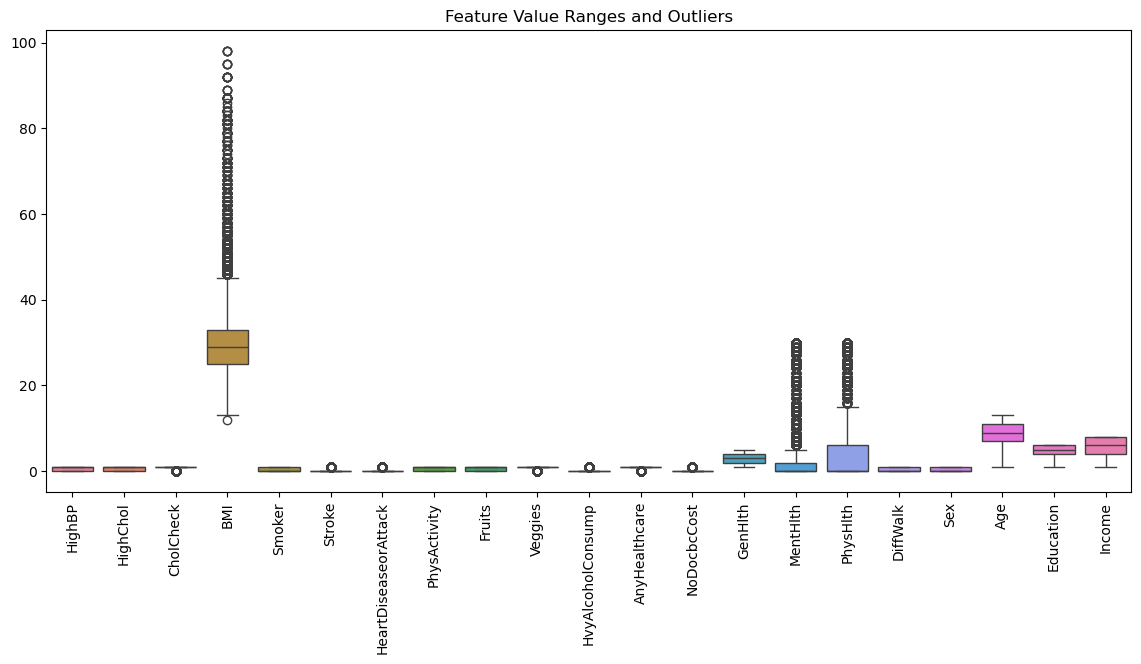

In [20]:
# BoxPlots of all featues
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop('Diabetes_binary', axis=1))
plt.xticks(rotation=90)
plt.title("Feature Value Ranges and Outliers")
plt.show()

- Outliers in `BMI`, `CholCheck`, `Stroke`, `HeartDiseaseorAttack`, `Viggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `MentHlth` and `PhysHlth`. Binary features showing outliers seem to just suggest inbalance and at not incorrect data. 

#### Lets count how many are in each of the non binary features using the IQR method

In [22]:
def count_outliers_iqr(df):
    outlier_counts = {}

    # Loop over each numeric feature
    for col in df.columns:
        if df[col].nunique() > 2:  # Skip binary features
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_counts[col] = len(outliers)

    return pd.Series(outlier_counts).sort_values(ascending=False)

# 
outlier_summary = count_outliers_iqr(df.drop("Diabetes_binary", axis=1))
display(outlier_summary)


MentHlth     11816
PhysHlth     10624
BMI           2181
GenHlth          0
Age              0
Education        0
Income           0
dtype: int64

#### lets take a look at the distribution of values in each of the 3 outlier heavy features. 

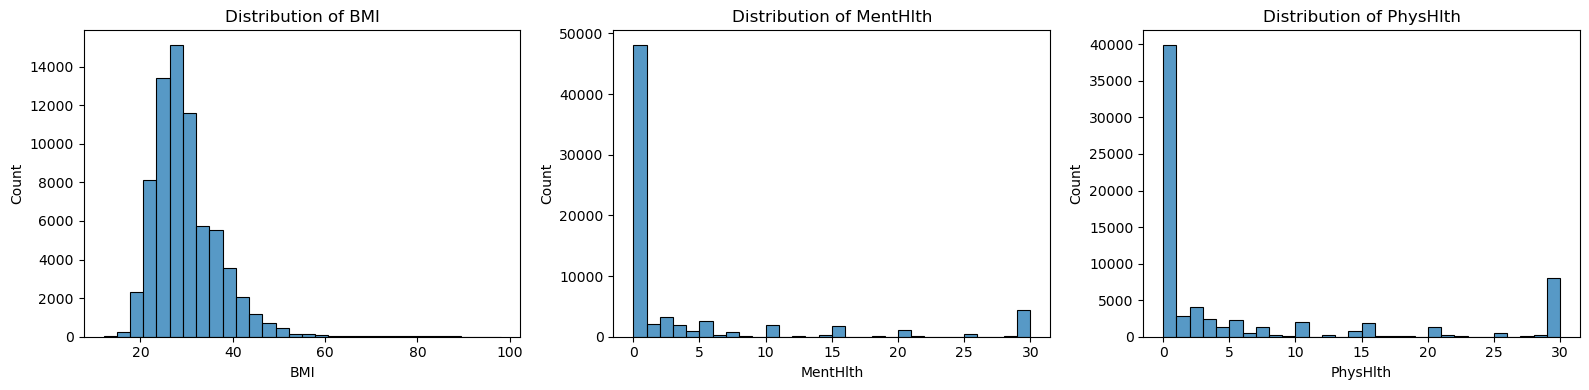

In [24]:
# Plot histograms for the 3 features
plt.figure(figsize=(16, 4))

for i, col in enumerate(['BMI', 'MentHlth', 'PhysHlth']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=col, bins=30, kde=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### We see that both mental and physical health has distinct grouping at 30 days. This makes me curious on how these two features correlate with the target variable

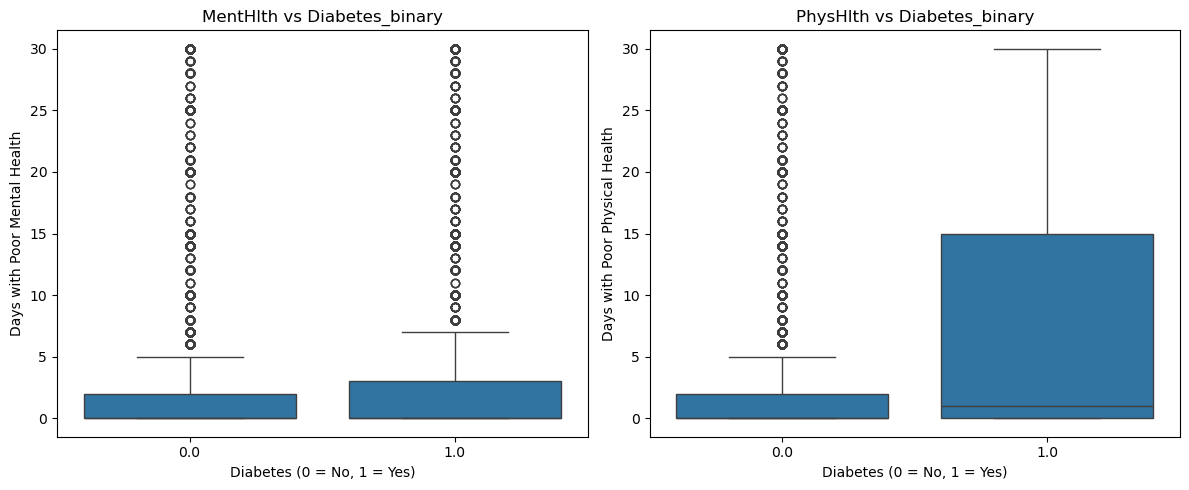

In [26]:
plt.figure(figsize=(12, 5))

# MentHlth
plt.subplot(1, 2, 1)
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=df)
plt.title("MentHlth vs Diabetes_binary")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Days with Poor Mental Health")

# PhysHlth
plt.subplot(1, 2, 2)
sns.boxplot(x='Diabetes_binary', y='PhysHlth', data=df)
plt.title("PhysHlth vs Diabetes_binary")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Days with Poor Physical Health")

plt.tight_layout()
plt.show()


#### surprisingly mental health does not seem to differ much amoung people with and without diabetes. Most people report 0, or between 0-3 in both groups. This suggest that mental health can be a contributor but not necessarily. Physical health on the other hand sees a much wider spread of reported health. A much bigger proportion of people WITH diabetes, report a higher number of days with poor physical health. The avarage number of reported days with bad physical health doubled from 4 in the group without diabetes to 8 in the group with. 

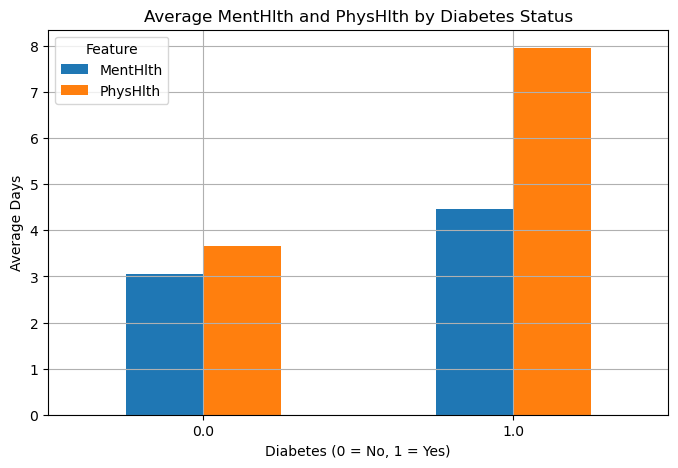

In [28]:
# Find Mean 
mean_comparison = df.groupby("Diabetes_binary")[["MentHlth", "PhysHlth"]].mean()


# Plot
mean_comparison.plot(kind='bar', figsize=(8, 5))
plt.title("Average MentHlth and PhysHlth by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Average Days")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.grid(True)
plt.show()


#### BMI value count, color coded green for "no diabetes" and red for "diabetes"
- Shows a clear trend, as BMI increase the proportion of people with diabets amoungs people in that BMI group increase.

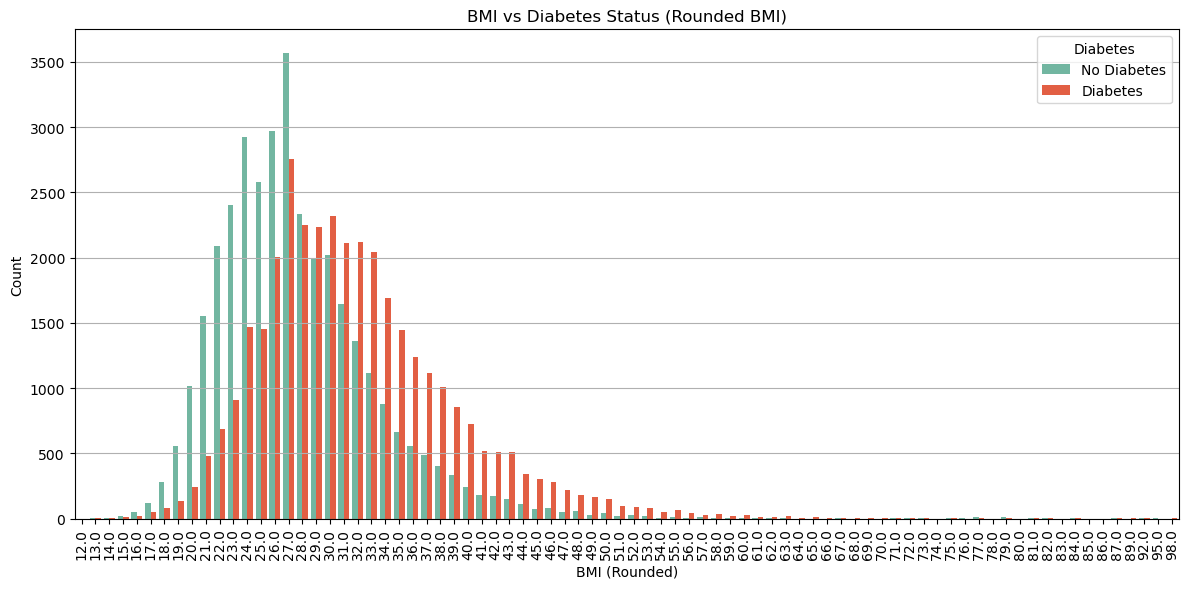

In [30]:
plt.figure(figsize=(12, 6))

#  
sns.countplot(
    x=df['BMI'].round(),  # round on the fly
    hue=df['Diabetes_binary'],
    palette={0: '#66c2a5', 1: '#fc4e2a'}  # blue = no diabetes, red = diabetes
)

plt.title("BMI vs Diabetes Status (Rounded BMI)")
plt.xlabel("BMI (Rounded)")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["No Diabetes", "Diabetes"])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Correlation 

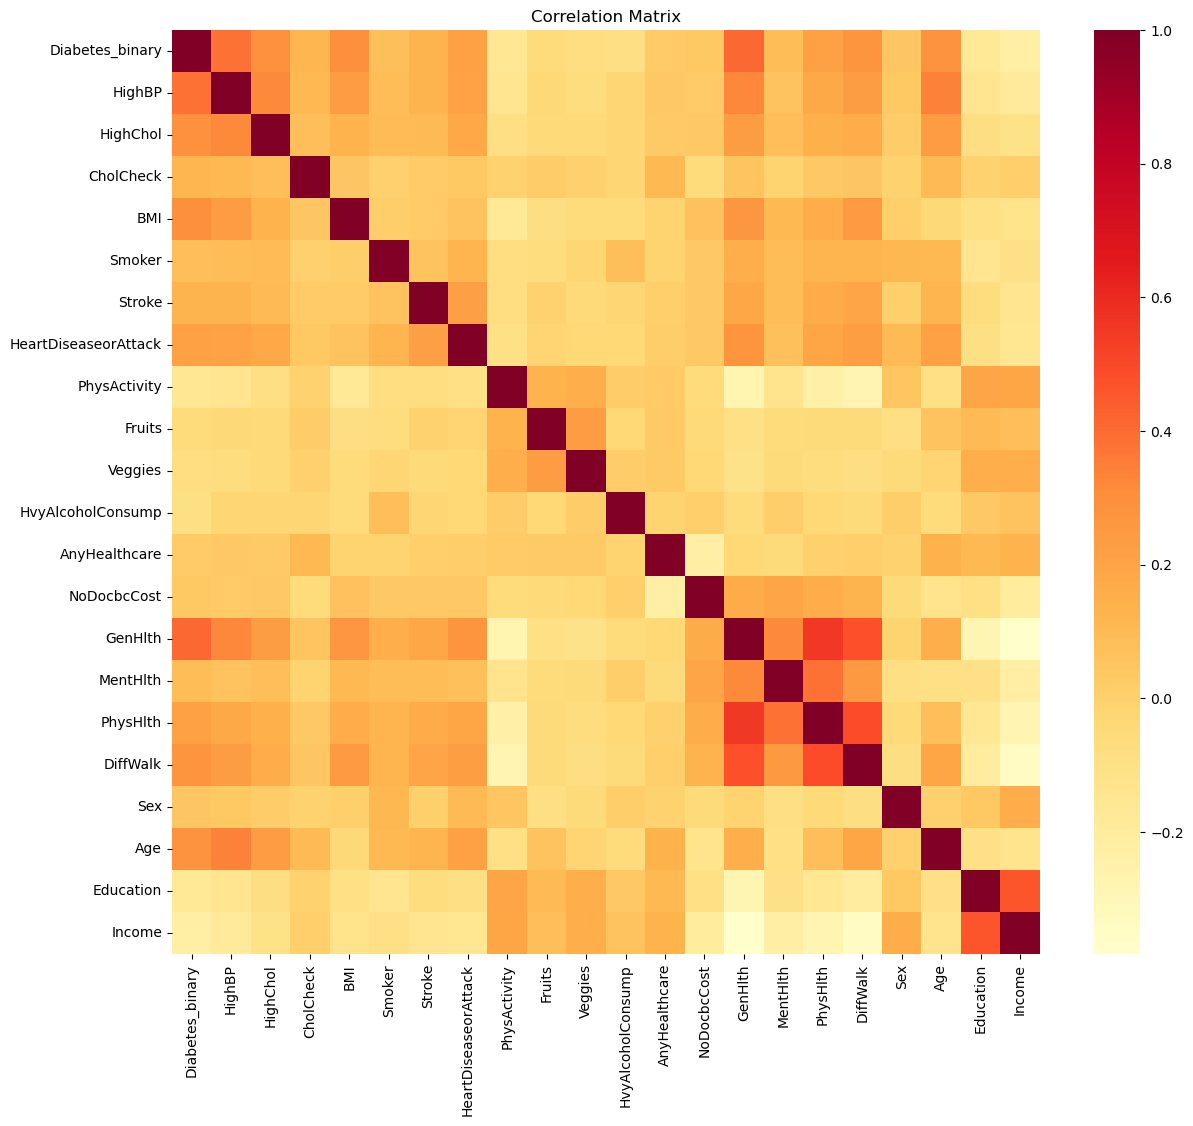

Top positive correlations with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
Name: Diabetes_binary, dtype: float64

Top negative correlations with Diabetes_binary:
Income              -0.224449
Education           -0.170481
PhysActivity        -0.158666
HvyAlcoholConsump   -0.094853
Veggies             -0.079293
Fruits              -0.054077
AnyHealthcare        0.023191
NoDocbcCost          0.040977
Sex                  0.044413
Smoker               0.085999
Name: Diabetes_binary, dtype: float64


In [32]:
# Correlation matrix 
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Top positively correlated features 
print("Top positive correlations with Diabetes_binary:")
print(corr["Diabetes_binary"].sort_values(ascending=False).head(10))

# Top negatively correlated features 
print("\nTop negative correlations with Diabetes_binary:")
print(corr["Diabetes_binary"].sort_values().head(10))

#### Top Positively Correlated Features:
- `GenHlth`: Individuals who rate their general health as poor are more likely to have diabetes
- `HighBP`: High blood pressure is strongly associated with diabetes, which aligns with known medical risk factors
- `BMI`:  Higher BMI (Body Mass Index) is a known contributor to diabetes risk
- `Age`: Older individuals have a higher likelihood of having diabetes
- `DiffWalk`: Difficulty walking may be a symptom or consequence of diabetes-related complications

#### Top Negatively Correlated Features:

- `Income`: Lower income levels are associated with higher diabetes risk, possibly due to access to healthcare, diet, and lifestyle
- `Education`: Lower education levels may correlate with reduced health literacy or awareness of prevention strategies

##### Correlation does not equal causation. most features are binary or ordinal. However, results involving binary variables may be interpreted but there are other options. im not gonna do it this notebook but:
- Spearman's Rank Correlation
- Cramér's V (for categorical–categorical)


## 4. Train / Validation / Test Split

### explain splitting logic and maybe some notes on splitting in general

### 📊 Data Splitting Strategy

To ensure fair and reliable evaluation of our models, the dataset is split into three parts:

- **70% Training set**: Used to train machine learning models
- **15% Validation set**: Used to compare and tune models 
- **15% Test set**: Held out until the end to evaluate the final selected model on unseen data

Since the dataset is balanced i did **not use stratified sampling**.

In [6]:
# Separate features and target
X = df.drop("Diabetes_binary", axis=1)
Y = df["Diabetes_binary"]

# chekc
print("Features shape (X):", X.shape)
print("Target shape (y):", Y.shape)

Features shape (X): (70692, 21)
Target shape (y): (70692,)


In [41]:
Y.value_counts()

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

# Second split: 50% val, 50% test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (49484, 21)
Validation set: (10604, 21)
Test set: (10604, 21)


In [10]:
print("Training set:", Y_train.shape)
print("Validation set:", Y_val.shape)
print("Test set:", Y_test.shape)

Training set: (49484,)
Validation set: (10604,)
Test set: (10604,)


# should we deal with these ? its not that many rows

In [51]:
df.duplicated().sum()

1635

## ⚙️ Feature Scaling

I am planning to use **Logistic Regression** and it is sensitive to feature scale. Features like `BMI` or `MentHlth` have wider ranges compared to binary features (like `Smoker`). unscaled data could bias the model. To ensure fair performance I applied **standardization** using `StandardScaler`.

- Centers the features (mean = 0)
- Scales them to have unit variance (standard deviation = 1)
- **fit the scaler only on the training set** to avoid data leakage
- **appy the same transformation** to the validation and test sets using the fitted scaler

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Models
### Logistic Regression
Logistic Regression is a widely used algorithm for solving **binary classification problems**. It works by estimating the **probability** that a given input belongs to a certain class based on a linear combination of input features.

- Efficient on large datasets
- Easy to interpret (via feature coefficients)
- can help give an overview of important factors 

##  Lets quickly explain the metrics we are gonna use for validating model performance
- **Accuracy**: Out of all predictions made, how many were right?
- **Precision**: When the model says someone has diabetes, how often is it correct? High precision = low false positive rate
- **Recall (Sensitivity)**: Out of all the people who actually have diabetes, how many did the model find? High recall = low false negative rate
- **F1 Score**: A single score that balances how many true positives you found (recall) with how accurate those positive predictions were (precision)
#### There is also a explanation of how to calculate each at the bottom of the notebook

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the model
lg = LogisticRegression()
lg.fit(X_train_scaled, Y_train)

# Predict on training and validation sets
Y_lg_train_pred = lg.predict(X_train_scaled)
Y_lg_val_pred = lg.predict(X_val_scaled)

### evaluate

In [17]:
# Evaluate both
def evaluate_model(y_true, y_pred, label):
    print(f"{label} Set:")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))
    print("-" * 30)

evaluate_model(Y_train, Y_lg_train_pred, "Training")
evaluate_model(Y_val, Y_lg_val_pred, "Validation")

Training Set:
Accuracy : 0.748
Precision: 0.7387
Recall   : 0.7674
F1 Score : 0.7528
------------------------------
Validation Set:
Accuracy : 0.7506
Precision: 0.7397
Recall   : 0.7717
F1 Score : 0.7554
------------------------------


- The model shows very similar performance on both the training and validation sets, indicating good generalization and no signs of overfitting.
- Recall is greater then precision, so the model is better at finding people who has diabetes then it is at reducing false positives. In our case this is good because we are much more worried about flase negative compared to false positives. a false positve means more resources spend "badly" but a false negative can lead to really bad outcomes. 
- overall good scores with defaulth hyperparams

### Lets look at the Logistic Regression Coefficients

In [64]:
import numpy as np
import pandas as pd

# Get feature names
feature_names = X.columns

# Get coefficients and combine into DataFrame
coefficients = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lg.coef_[0]
})

# Sort by absolute value to see strongest effects
coefficients["Abs_Coefficient"] = np.abs(coefficients["Coefficient"])
coefficients = coefficients.sort_values(by="Abs_Coefficient", ascending=False)

# Drop the helper column for display
coefficients = coefficients.drop(columns="Abs_Coefficient")

# Display
coefficients.reset_index(drop=True, inplace=True)
coefficients

,Feature,Coefficient
0,GenHlth,0.651015
1,BMI,0.536354
2,Age,0.432143
3,HighBP,0.362681
4,HighChol,0.294290
5,CholCheck,0.200968
6,HvyAlcoholConsump,-0.150861
7,Income,-0.128815
8,Sex,0.127135
9,HeartDiseaseorAttack,0.088830


The 3 strongest coefficients. 
- GenHlth (0.651015
- BMI (0.536354)
- Age (0.432143)

# random forest classifier 

Random Forest builds multiple decision trees and combines their predictions to produce a more accurate and stable output. It is especially well-suited for classification problems involving **structured data** with both categorical and numerical features.
- Is robust to outliers and noisy features
- Reduces overfitting by averaging across many trees
- feature importance scores can highlight the most influential health indicators.

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest (default settings)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Predict
Y_rf_train_pred = rf.predict(X_train)
Y_rf_val_pred = rf.predict(X_val)

# Evaluate 

In [68]:
# Evaluate
evaluate_model(Y_train, Y_rf_train_pred, "Training")
evaluate_model(Y_val, Y_rf_val_pred, "Validation")

Training Set:
Accuracy : 0.9955
Precision: 0.9966
Recall   : 0.9943
F1 Score : 0.9955
------------------------------
Validation Set:
Accuracy : 0.7417
Precision: 0.7238
Recall   : 0.78
F1 Score : 0.7509
------------------------------


- The Random Forest model performs **extremely well on the training set**. 
This indicates that the modelis **overfitting** to the training data. it is learning patterns too specific to that data and not generalizing as well the unseen validation set.

- for now the **recall on the validation set is 0.78**, which still aligns with our primary goal

- we need to try some hyperparameters to see if we can reduce the overfitting. This will be done after we get initial performance metrics from each "default" model. 



# feature importance 

     Feature  Importance
0        BMI    0.170330
1        Age    0.126867
2    GenHlth    0.101952
3     Income    0.084287
4     HighBP    0.077724
5   PhysHlth    0.068045
6  Education    0.057108
7   MentHlth    0.051976
8   HighChol    0.040477
9     Smoker    0.028869


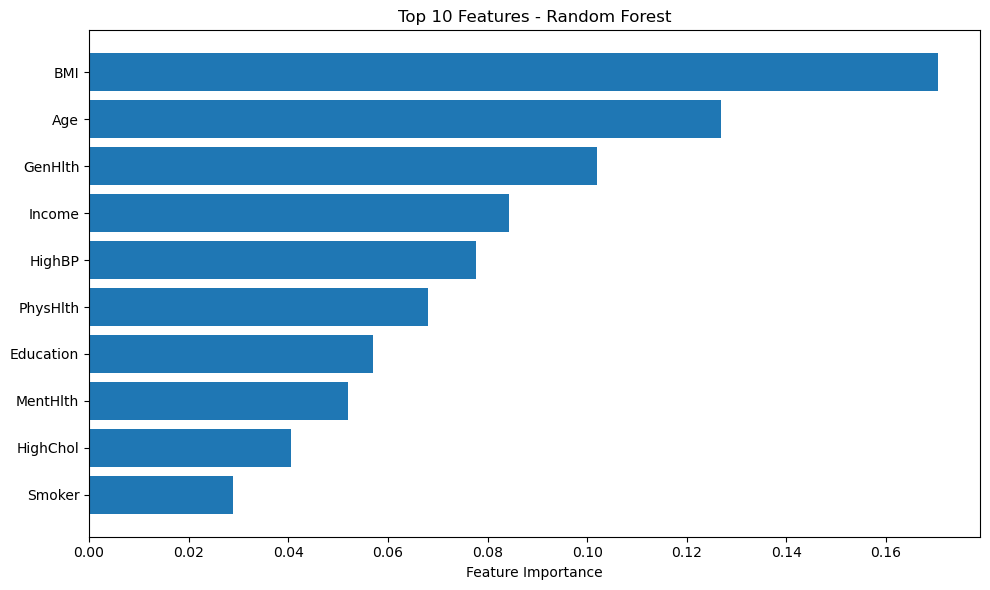

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = rf.feature_importances_

# Create DataFrame with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df.reset_index(drop=True, inplace=True)
print(feature_importance_df.head(10))

# Optional: plot the top 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features - Random Forest")
plt.tight_layout()
plt.show()


# XGB classifier

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, Y_train)

# Predict
Y_train_pred = xgb.predict(X_train)
Y_val_pred = xgb.predict(X_val)

# evaluate

In [80]:
# Evaluate
evaluate_model(Y_train, Y_train_pred, "Training")
evaluate_model(Y_val, Y_val_pred, "Validation")

Training Set:
Accuracy : 0.791
Precision: 0.7696
Recall   : 0.8305
F1 Score : 0.7989
------------------------------
Validation Set:
Accuracy : 0.7495
Precision: 0.7297
Recall   : 0.7912
F1 Score : 0.7592
------------------------------


# Naive Bayes 

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
nb = GaussianNB()
nb.fit(X_train_scaled, Y_train)

# Predict
Y_nb_train_pred = nb.predict(X_train_scaled)
Y_nb_val_pred = nb.predict(X_val_scaled)

# evaluate

In [91]:
# Evaluate
evaluate_model(Y_train, Y_nb_train_pred, "Training")
evaluate_model(Y_val, Y_nb_val_pred, "Validation")

Training Set:
Accuracy : 0.7189
Precision: 0.7257
Recall   : 0.7037
F1 Score : 0.7145
------------------------------
Validation Set:
Accuracy : 0.7243
Precision: 0.728
Recall   : 0.7145
F1 Score : 0.7212
------------------------------


### comparing model scores before tuning hyperparams


#### Training Set
| Model              | Accuracy | Precision | Recall | F1 Score |
|--------------------|----------|-----------|--------|----------|
| Logistic Regression| 0.748    | 0.7387    | 0.7674 | 0.7528   |
| Random Forest      | 0.9955   | 0.9966    | 0.9943 | 0.9955   |
| XGBoost            | 0.791    | 0.7696    | 0.8305 | 0.7989   |
| Naive Bayes        | 0.7189   | 0.7257    | 0.7037 | 0.7145   |

#### Validation Set
| Model              | Accuracy | Precision | Recall | F1 Score |
|--------------------|----------|-----------|--------|----------|
| Logistic Regression| 0.7506   | 0.7397    | 0.7717 | 0.7554   |
| Random Forest      | 0.7417   | 0.7238    | 0.7800 | 0.7509   |
| XGBoost            | 0.7495   | 0.7297    | 0.7912 | 0.7592   |
| Naive Bayes        | 0.7243   | 0.7280    | 0.7145 | 0.7212   |


#### its easier to see get an overview of the preditions with an confusion matrix. We can see exactly how many are in each group

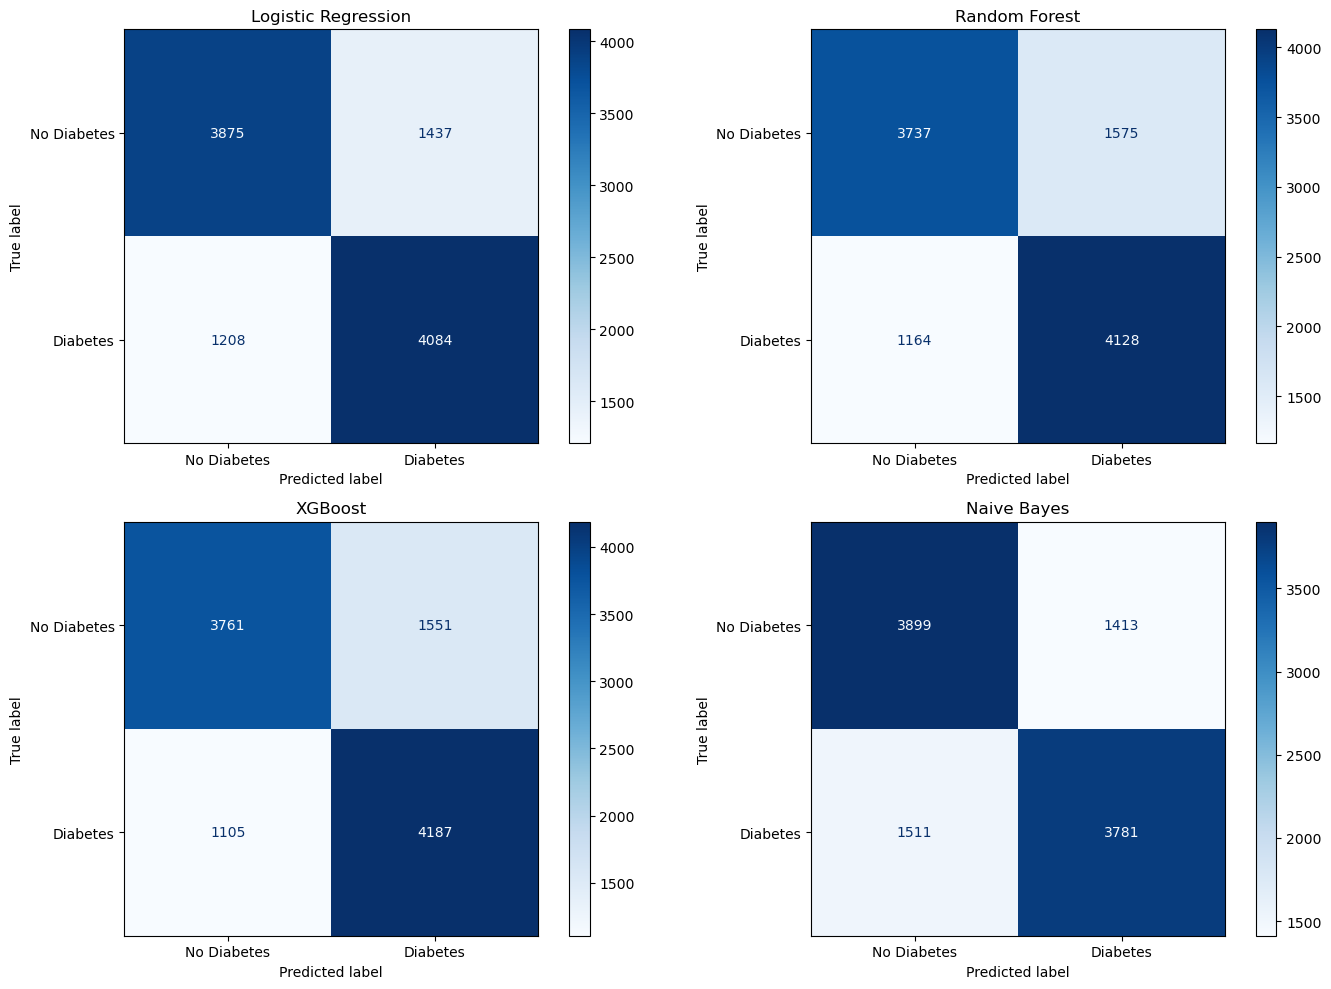

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models and names
models = [
    ("Logistic Regression", lg, X_val_scaled),
    ("Random Forest", rf, X_val),
    ("XGBoost", xgb, X_val),
    ("Naive Bayes", nb, X_val_scaled)
]

# Plot confusion matrix for each
plt.figure(figsize=(14, 10))

for i, (name, model, X_val_input) in enumerate(models, 1):
    y_pred = model.predict(X_val_input)
    cm = confusion_matrix(Y_val, y_pred)
    plt.subplot(2, 2, i)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
    disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
    plt.title(name)

plt.tight_layout()
plt.show()


#### I want to see if we can fix the overfitting problems with random forest. I have a fealing the model is/will perform very nicely, we just need to change the training process a bit to make sure its not overfitting to our variables. lets now try and tune the parameters to see if we can improve the results 

- Max depth: Deafault is none which means trees will keep splitting until each leaf is pure or it gets so small that min_samples_split sample is reached. If we limit this to something between 5-15 we avoid overly complex splitting logic. 
- max features: this is the method used for selection of features. The model creates many trees and select a subsection of features for each tree. This is to avoid that reduce correlation between trees. im gonna leave this at sqrt for now.
- min sampels leaf default is 1. min samples split default 2. The default setting for these two params combined ensure a highly flexible trees. only need 2 samples to split and a leaf node must contain at least 1. this means the model WILL split even on smaller signals. The is probably a big contributor to the overfitting. im gonna start with min split of 5 and min leaf node 2. this will force the trees to split on stronger signals.
- n_estimators: this is 200 by default. It repesent how many trees we would like in the forest. in theory this should just be as high as possible without your setup getting overworked. im just gonna increase it to 500 to start with.  

In [89]:
from sklearn.ensemble import RandomForestClassifier

def train_and_evaluate_rf(
    X_train, Y_train,
    X_val, Y_val,
    version_label,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
):
 
    # Train
    model = RandomForestClassifier(
        max_depth=max_depth,
        max_features='sqrt',
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        n_estimators=500,
        random_state=42
    )
    model.fit(X_train, Y_train)

    # Predict
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)

    # Evaluate
    evaluate_model(Y_train, Y_train_pred, f"Training ({version_label})")
    evaluate_model(Y_val, Y_val_pred, f"Validation ({version_label})")

    return model

In [99]:
# Tuned A: slightly shallow trees, modest leaf size
rf_a = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned A",
    max_depth=7,
    min_samples_leaf=2,
    min_samples_split=5
)

# Tuned B: deeper trees, more flexibility to split
rf_b = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned B",
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2
)

# Tuned C: shallow trees with strong regularization
rf_c = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned C",
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=10
)

# Tuned D: moderately deep trees with tighter control on leaf size
rf_d = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned D",
    max_depth=8,
    min_samples_leaf=3,
    min_samples_split=5
)

# Tuned E: deep trees with a bit more regularization
rf_e = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned E",
    max_depth=12,
    min_samples_leaf=2,
    min_samples_split=10
)


# grid search suggestion
rf_f = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned F",
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=10
)

Training (Tuned A) Set:
Accuracy : 0.7518
Precision: 0.7324
Recall   : 0.7935
F1 Score : 0.7617
------------------------------
Validation (Tuned A) Set:
Accuracy : 0.7508
Precision: 0.7309
Recall   : 0.7925
F1 Score : 0.7605
------------------------------
Training (Tuned B) Set:
Accuracy : 0.7761
Precision: 0.7555
Recall   : 0.8162
F1 Score : 0.7847
------------------------------
Validation (Tuned B) Set:
Accuracy : 0.7544
Precision: 0.7336
Recall   : 0.7976
F1 Score : 0.7643
------------------------------
Training (Tuned C) Set:
Accuracy : 0.7433
Precision: 0.7271
Recall   : 0.7789
F1 Score : 0.7521
------------------------------
Validation (Tuned C) Set:
Accuracy : 0.747
Precision: 0.7295
Recall   : 0.7834
F1 Score : 0.7555
------------------------------
Training (Tuned D) Set:
Accuracy : 0.7579
Precision: 0.7375
Recall   : 0.8007
F1 Score : 0.7678
------------------------------
Validation (Tuned D) Set:
Accuracy : 0.7535
Precision: 0.7319
Recall   : 0.7986
F1 Score : 0.7638
--------

## Random Forest Performance Summary (Tuned A–F)

###  Training Set

| Version   | Accuracy | Precision | Recall | F1 Score |
|-----------|----------|-----------|--------|----------|
| Tuned A   | 0.7518   | 0.7324    | 0.7935 | 0.7617   |
| Tuned B   | 0.7761   | 0.7555    | 0.8162 | 0.7847   |
| Tuned C   | 0.7433   | 0.7271    | 0.7789 | 0.7521   |
| Tuned D   | 0.7579   | 0.7375    | 0.8007 | 0.7678   |
| Tuned E   | 0.7904   | 0.7688    | 0.8303 | 0.7984   |
| **Tuned F** | **0.8196** | **0.7970** | **0.8578** | **0.8262** |

---

###  Validation Set

| Version   | Accuracy | Precision | Recall | F1 Score |
|-----------|----------|-----------|--------|----------|
| Tuned A   | 0.7508   | 0.7309    | 0.7925 | 0.7605   |
| Tuned B   | 0.7544   | **0.7336** | 0.7976 | 0.7643   |
| Tuned C   | 0.7470   | 0.7295    | 0.7834 | 0.7555   |
| Tuned D   | 0.7535   | 0.7319    | 0.7986 | 0.7638   |
| **Tuned E** | **0.7543** | 0.7333    | **0.7980** | **0.7643** |
| Tuned F   | 0.7508   | 0.7297    | 0.7950 | 0.7610   |


#### longer depth(12) and combined with a min split of 10 and min leaf node of 2

- more depth seem to work well
- ensuring a min of 10 samples for splits combined with a min of 2 samples to be a leaf node means we enforce a bit more control.
- depth of 15 introduced overfitting. 
- lets now try to experiment with the depth a little bit. 

In [119]:
rf_10 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 10",
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10
)
rf_11 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 11",
    max_depth=11,
    min_samples_leaf=2,
    min_samples_split=10
)
rf_12 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 12",
    max_depth=12,
    min_samples_leaf=2,
    min_samples_split=10
)
rf_13 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 13",
    max_depth=13,
    min_samples_leaf=2,
    min_samples_split=10
)
rf_14 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 14",
    max_depth=14,
    min_samples_leaf=2,
    min_samples_split=10
)
rf_15 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 15",
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=10
)

Training (Tuned 10) Set:
Accuracy : 0.7718
Precision: 0.7509
Recall   : 0.8133
F1 Score : 0.7809
------------------------------
Validation (Tuned 10) Set:
Accuracy : 0.753
Precision: 0.7309
Recall   : 0.7995
F1 Score : 0.7636
------------------------------
Training (Tuned 11) Set:
Accuracy : 0.7809
Precision: 0.7598
Recall   : 0.8215
F1 Score : 0.7894
------------------------------
Validation (Tuned 11) Set:
Accuracy : 0.7538
Precision: 0.7332
Recall   : 0.7965
F1 Score : 0.7635
------------------------------
Training (Tuned 12) Set:
Accuracy : 0.7904
Precision: 0.7688
Recall   : 0.8303
F1 Score : 0.7984
------------------------------
Validation (Tuned 12) Set:
Accuracy : 0.7543
Precision: 0.7333
Recall   : 0.798
F1 Score : 0.7643
------------------------------
Training (Tuned 13) Set:
Accuracy : 0.8003
Precision: 0.7782
Recall   : 0.8399
F1 Score : 0.8079
------------------------------
Validation (Tuned 13) Set:
Accuracy : 0.7552
Precision: 0.7348
Recall   : 0.7971
F1 Score : 0.7647
-


## Random Forest Performance (Tuned 10–15)

### 🧪 Training Set

| Version   | Accuracy | Precision | Recall | F1 Score |
|-----------|----------|-----------|--------|----------|
| Tuned 10  | 0.7718   | 0.7509    | 0.8133 | 0.7809   |
| Tuned 11  | 0.7809   | 0.7598    | 0.8215 | 0.7894   |
| Tuned 12  | 0.7904   | 0.7688    | 0.8303 | 0.7984   |
| Tuned 13  | 0.8003   | 0.7782    | 0.8399 | 0.8079   |
| Tuned 14  | 0.8098   | 0.7874    | 0.8488 | 0.8170   |
| **Tuned 15** | **0.8196** | **0.7970** | **0.8578** | **0.8262** |

---

### ✅ Validation Set

| Version   | Accuracy | Precision | Recall | F1 Score |
|-----------|----------|-----------|--------|----------|
| Tuned 10  | 0.7530   | 0.7309    | **0.7995** | 0.7636   |
| Tuned 11  | 0.7538   | 0.7332    | 0.7965 | 0.7635   |
| Tuned 12  | 0.7543   | 0.7333    | 0.7980 | 0.7643   |
| **Tuned 13**  | **0.7552** | **0.7348** | 0.7971 | **0.7647** |
| Tuned 14  | 0.7536   | 0.7324    | 0.7978 | 0.7637   |
| Tuned 15  | 0.7508   | 0.7297    | 0.7950 | 0.7610   |


- there is a tradeoff between overfitting and validation score. Increasing the depth also increses overfitting. around 13 seems to perform best on the validation set but at the cost of some amount of overfitting. 10 seems to maximize recall has minimal overfitting and overall strong scores. 

#### lets try and really fine tune the params while keeping the max depth to 10.

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500],
    'max_depth': [10],
    'min_samples_split': [2,10,11],
    'min_samples_leaf': [1,2,3]
}


# Create model and grid search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, Y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict on validation set
Y_val_pred = best_rf.predict(X_val)

# Evaluate
evaluate_model(Y_train, best_rf.predict(X_train), "Training (Tuned)")
evaluate_model(Y_val, Y_val_pred, "Validation (Tuned)")

# Show best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training (Tuned) Set:
Accuracy : 0.7761
Precision: 0.7555
Recall   : 0.8162
F1 Score : 0.7847
------------------------------
Validation (Tuned) Set:
Accuracy : 0.7544
Precision: 0.7336
Recall   : 0.7976
F1 Score : 0.7643
------------------------------
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


#### This set of params seems to perform the best within this depth.
- after a little testing i decided to use min_sample_leaf of 2 and min_sample_split of 11. 

In [181]:
# Tuned 444
rf_444 = train_and_evaluate_rf(
    X_train, Y_train, X_val, Y_val,
    version_label="Tuned 444",
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=11
)

Training (Tuned 333) Set:
Accuracy : 0.7716
Precision: 0.7507
Recall   : 0.8132
F1 Score : 0.7807
------------------------------
Validation (Tuned 333) Set:
Accuracy : 0.7551
Precision: 0.7334
Recall   : 0.8001
F1 Score : 0.7653
------------------------------


### Try the final model on the test set

Test Set (Final Random Forest) Set:
Accuracy : 0.7517
Precision: 0.7312
Recall   : 0.7979
F1 Score : 0.7631
------------------------------


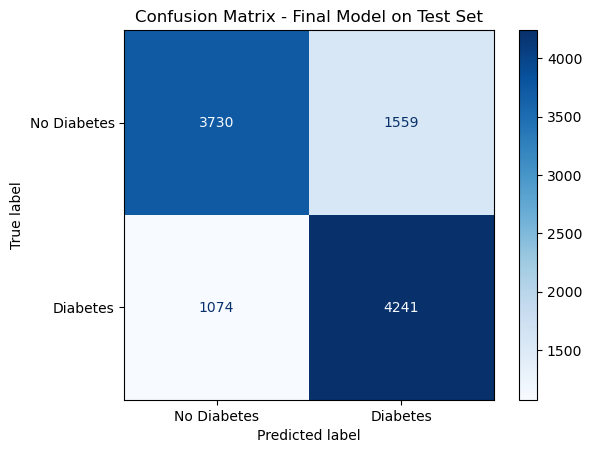

In [195]:
# Predict on test set
Y_final = rf_444.predict(X_test)

# Evaluate performance
evaluate_model(Y_test, Y_final, "Test Set (Final Random Forest)")

# 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Final Model on Test Set")
plt.grid(False)
plt.show()

## Final Model: Random Forest Classifier (Tuned)

After lookin at multiple models (Logistic Regression, XGBoost, Naive Bayes, and Random Forest), the **tuned Random Forest** was selected as the final model.

- High **recall** (priority: catching diabetic cases)
- Strong generalization from training to validation to test set
- Robust performance across all evaluation metrics
- By tuning hyperparameters, we reduced overfitting and improved recall — the most critical metric in this healthcare context.

### Final Hyperparameters:

```python
{
  'n_estimators': 500,
  'max_depth': 10,
  'min_samples_split': 11,
  'min_samples_leaf': 2,
  'max_features': 'sqrt'
}


## 7. deployment

In [205]:
import joblib

# Save the best model 
joblib.dump(rf_444, 'diabetes_model.pkl')

['diabetes_model.pkl']

## 📏 Model Evaluation Metrics

- **Accuracy**: The percentage of total predictions that were correct  
  $$
  Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**: Of all the cases predicted as positive, how many were actually positive  
  $$
  Precision = \frac{TP}{TP + FP}
  $$

- **Recall (Sensitivity)**: Of all actual positive cases, how many did the model correctly identify  
  $$
  Recall = \frac{TP}{TP + FN}
  $$

- **F1 Score**: Harmonic mean of precision and recall  
  $$
  F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
  $$

- **Accuracy**: Out of all predictions made, how many were right?
- **Precision**: When the model says someone has diabetes, how often is it correct? High precision = low false positive rate
- **Recall (Sensitivity)**: Out of all the people who actually have diabetes, how many did the model find? High recall = low false negative rate
- **F1 Score**: A single score that balances how many true positives you found (recall) with how accurate those positive predictions were (precision)

## Overfitting

**Overfitting** happens when a machine learning model performs very well on the training data but poorly on new, unseen data (like the validation or test set). This means the model has learned not just the general patterns, but also the noise or specific quirks of the training data.

### How to Spot Overfitting

You can usually detect overfitting by comparing performance across datasets:

- **High accuracy on training set**
- **Significantly lower accuracy on validation/test set**

This performance gap suggests the model doesn't generalize well.

### Why Overfitting Happens

- The model is too complex for the amount of data (e.g., too many parameters)
- Training for too many iterations or epochs
- Lack of regularization or feature selection